In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

who_df = pd.read_csv('WHO.csv')
print(who_df)

                Country  CountryID  Continent  Adolescent fertility rate (%)  \
0           Afghanistan          1          1                          151.0   
1               Albania          2          2                           27.0   
2               Algeria          3          3                            6.0   
3               Andorra          4          2                            NaN   
4                Angola          5          3                          146.0   
..                  ...        ...        ...                            ...   
197             Vietnam        198          6                           25.0   
198  West Bank and Gaza        199          1                            NaN   
199               Yemen        200          1                           83.0   
200              Zambia        201          3                          161.0   
201            Zimbabwe        202          3                          101.0   

     Adult literacy rate (%)  \
0      

In [2]:
who_sum_df = who_df[['Country', 'CountryID', 'Continent', 'Gross national income per capita (PPP international $)', 'Population (in thousands) total', 'Population annual growth rate (%)']].copy()
who_sum_df

,Country,CountryID,Continent,Gross national income per capita (PPP international $),Population (in thousands) total,Population annual growth rate (%)
0,Afghanistan,1,1,NaN,26088.0,4.0
1,Albania,2,2,6000.0,3172.0,0.6
2,Algeria,3,3,5940.0,33351.0,1.5
3,Andorra,4,2,NaN,74.0,1.0
4,Angola,5,3,3890.0,16557.0,2.8
...,...,...,...,...,...,...
197,Vietnam,198,6,2310.0,86206.0,1.4
198,West Bank and Gaza,199,1,NaN,NaN,NaN
199,Yemen,200,1,2090.0,21732.0,3.0
200,Zambia,201,3,1140.0,11696.0,1.9


In [3]:
condition = who_sum_df['Country'] == 'Canada'
canada_row = who_sum_df[condition].values
canada_row #north america continent = 4
#confirm continent num
condition_country = who_sum_df['Continent'] == 4
north_america = who_sum_df[condition_country].values
north_america

array([['Antigua and Barbuda', 6, 4, 15130.0, 84.0, 1.3],
       ['Bahamas', 12, 4, nan, 327.0, 1.2],
       ['Barbados', 15, 4, 15150.0, 293.0, 0.3],
       ['Bermuda', 20, 4, nan, nan, nan],
       ['Canada', 32, 4, 36280.0, 32577.0, 0.9],
       ['Mexico', 116, 4, 11990.0, 105342.0, 1.0],
       ['United States of America', 193, 4, 44070.0, 302841.0, 1.0]],
      dtype=object)

**1. Create a DataFrame of the population growth rate of countries in North America. Drop all the rows with null values. Use Bar Chart to compare the population growth rates of these countries. Remember to set up the labels, titles, xticks, yticks appropriately, especially the yticks.  10 points**

In [4]:
north_amer = who_sum_df[who_sum_df.Continent == 4]
north_amer.drop(columns=['Gross national income per capita (PPP international $)'])
north_amer.isnull().sum()

Country                                                   0
CountryID                                                 0
Continent                                                 0
Gross national income per capita (PPP international $)    2
Population (in thousands) total                           1
Population annual growth rate (%)                         1
dtype: int64

In [5]:
north_amer_nonull = north_amer.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
north_amer_nonull.isnull().sum()

Country                                                   0
CountryID                                                 0
Continent                                                 0
Gross national income per capita (PPP international $)    0
Population (in thousands) total                           0
Population annual growth rate (%)                         0
dtype: int64

Text(0.5, 1.0, 'Population Annual Growth Rate per Country')

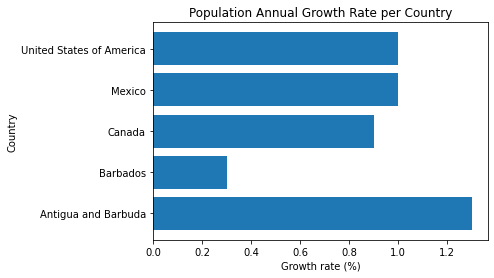

In [6]:
plt.barh(north_amer_nonull.iloc[:,0], north_amer_nonull.iloc[:,5])
plt.xlabel('Growth rate (%)')
plt.ylabel('Country')
plt.title('Population Annual Growth Rate per Country')

**2. Create a DataFrame by selecting the top 8 countries with the largest population and create a new row ‘other’ representing the total population of all other countries. Create a pie chart to show the consists of the global population. Use ‘explode’ to highlight the country with the largest population. Show the percentage numbers and labels on the chart. 10 points.**

In [7]:
highest_populations_df = pd.pivot_table(who_sum_df, values='Population (in thousands) total', index='Country', aggfunc='sum', margins=True)
eight_highest_pops = highest_populations_df.nlargest(9, 'Population (in thousands) total')
eight_highest_pops = eight_highest_pops.rename(index={'All':'other'})
eight_highest_pops = eight_highest_pops.reset_index(drop=False)
eight_highest_pops

,Country,Population (in thousands) total
0,other,6580923.0
1,China,1328474.0
2,India,1151751.0
3,United States of America,302841.0
4,Indonesia,228864.0
5,Brazil,189323.0
6,Pakistan,160943.0
7,Bangladesh,155991.0
8,Nigeria,144720.0


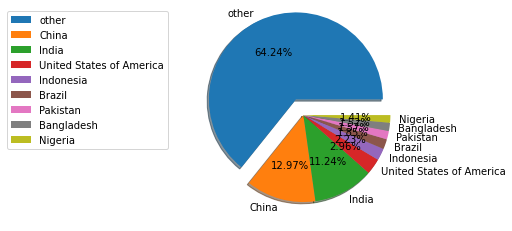

In [8]:
plt.pie(eight_highest_pops['Population (in thousands) total'],
        explode = [0.2, 0, 0, 0, 0, 0, 0, 0, 0],
       labels = eight_highest_pops['Country'],
       shadow = True,
       autopct = '%.2f%%')
plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.))
plt.show()

**3. Select the two columns ‘Gross national income per capita (PPP international $)’, ‘Population annual growth rate (%)’. Drop all the rows with any null values. Plot a scatter.**

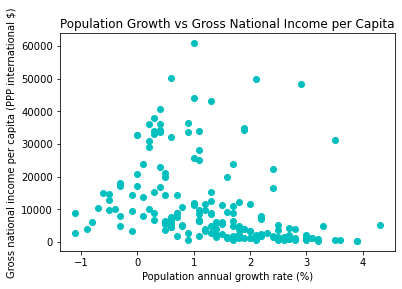

In [9]:
new_cols_df = who_sum_df[['Gross national income per capita (PPP international $)', 'Population annual growth rate (%)']]
new_cols_nonull = new_cols_df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
new_cols_nonull = new_cols_nonull.reset_index(drop=False)

x = new_cols_nonull['Population annual growth rate (%)'].values
plt.xlabel('Population annual growth rate (%)')
y = new_cols_nonull['Gross national income per capita (PPP international $)'].values
plt.ylabel('Gross national income per capita (PPP international $)')
plt.title('Population Growth vs Gross National Income per Capita')

plt.scatter(x, y, marker='o', color='c')
plt.show()

**4. Describe the above scatterplot (form, direction, strength, outliers). Use non-mathematical language to explain the results  Reference: https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/scatterplots-correlation/a/describing-scatterplots-form-direction-strength-outliers  10 points**

This scatterplot shows a weak, linear positive association between the gross national income per capita and population annual growth rate. There appears to be a few outliers where the national income per capita is relatively low, while the population still grew.

**5. Create an histogram of the column ‘Population annual growth rate (%)’. Describe the histogram, Where is the center of the data? What is the spread of the data? What is the range? What is the shape of the data? What are the outliers? 10 points Reference: https://www.labxchange.org/library/items/lb:LabXchange:10d3270e:html:1**

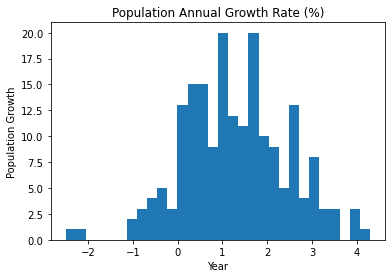

In [10]:
df_pop_growth = who_sum_df[['Population annual growth rate (%)']]
plt.hist(df_pop_growth, 30)
plt.xlabel('Year')
plt.ylabel('Population Growth')
plt.title('Population Annual Growth Rate (%)')

plt.show()

The histogram has a right-skewed distribution. The center, median, of the data appears to be between year 2 and 3, while the mean occurs at 3. The mode appears at both year 2 and 2. The range appears to be from  -1 to between 3 and 4, with years -2 and 4 containing outliers of similar values.

**6. Use your non-mathematical language to explain the result from the histogram to audiences.  10 points**

The histogram shows a trend where the majority of the data occurs towards the left of the graph, in the lower end of the x-axis. This shows that as the years increase, a spike occurs, after which the population growth appears to level off then drop. The highest year appears to return to the growth occurring in earlier years.

**7. Use a grouped bar plot to show the change of enrollments for these four categories of students. The x-axis should be the years.  Add a line chart in the same graph to show the change of the total enrollment over the years.  10 points**

In [11]:
data = [[8938, 8728, 8090, 7528, 6781], [640, 611, 552, 652, 575], [2291, 2407, 2321, 2803, 2788], [1651, 1987, 2275, 2436, 2574]]
index = ['Full-Time Undergraduate', 'Full-Time Graduate', 'Part-Time Undergraduate', 'Part-Time Graduate']
columns = [2017, 2018, 2019, 2020, 2021]
enrollments_df = pd.DataFrame(data=data, index=index, columns=columns)
enrollments_df.reset_index()
enrollments_df

,2017,2018,2019,2020,2021
Full-Time Undergraduate,8938,8728,8090,7528,6781
Full-Time Graduate,640,611,552,652,575
Part-Time Undergraduate,2291,2407,2321,2803,2788
Part-Time Graduate,1651,1987,2275,2436,2574


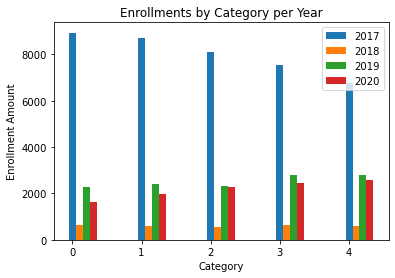

In [15]:
width = 0.1
x_axis = np.arange(0, 5)
plt.bar(x_axis, enrollments_df.iloc[0,:], width = width) #year 2017
# iloc[rows, columns]
plt.bar(x_axis+0.1*1, enrollments_df.iloc[1,:], width = width)
plt.bar(x_axis+0.1*2, enrollments_df.iloc[2,:], width = width)
plt.bar(x_axis+0.1*3, enrollments_df.iloc[3,:], width = width)
#plt.xticks(x_axis, index)
plt.legend(enrollments_df.columns[0:4], loc='best')
plt.title('Enrollments by Category per Year')
plt.xlabel('Category')
plt.ylabel('Enrollment Amount')
#plt.size()

#x = the years, y = enrollment number
plt.show()

**8. Use your own words to explain the result from the above bar chart. The overall trend, the trend for each group, the consist of the enrollment. Use one paragraph for each key point. 10 points     You can learn examples of interpreting data from these reports: https://www.pewresearch.org/publications/**

#explanation incorrect bc didn't understand graph; ^ correct graph above

Overall, there appears to be higher enrollment in the category 'Full-Time Undergraduate', with the highest enrollment year being 2017. This specific group has a strong right-skewed distribution, with the media occurring in 2019 and the mean occurring in 2018. The overall range is from 6000 to over 8000. 

The lowest category comes from the 'Full-Time Graduate' category, with the highest enrollment year being 2019. It has a relatively uniform distribution, consisting of no outliers, mean or median. This is showing that the enrollment remained relatively consistent through these four years. The range remains under 2000 per year.

The 'Part-Time Undergraduate' category appears to have a weak left-skewed distribution, with the highest enrollment year being 2019. The lowest year of enrollment is 2018, with the mean being 2017. This group also does not contain any outliers, and the range is from 2000 to below 4000. 

Lastly, the 'Part-Time Graduate' category has a strong left-skewed distribution, with the median being 2018, and the mean being 2017. The highest enrollment in this category occurred in 2020, with no outliers occurring overall. 

Overall, the outlier appears to be the 'Full-Time Graduate' category, showing the lowest enrollment rates across the years out of all groups presented. The upper outlier is the 'Full-Time Undergraduate', with the enrollment rates being the highest out of all groups. Both 'Part-Time' groups appear to represent the average or the mean for enrollment rates. 

**9. Change the above grouped bar chart to a stacked bar chart. 10 points.**

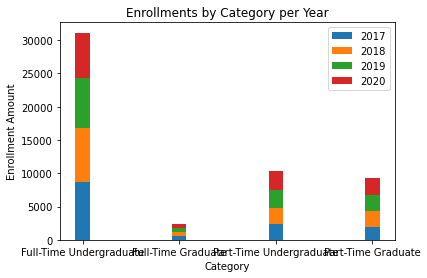

In [191]:
x_axis = np.arange(4)
width = 0.15
plt.bar(x_axis, enrollments_df.iloc[:,1], width = width)
plt.bar(x_axis, enrollments_df.iloc[:,2], width = width, bottom=enrollments_df.iloc[:,1])
plt.bar(x_axis, enrollments_df.iloc[:,3], width = width, bottom = enrollments_df.iloc[:,1]+enrollments_df.iloc[:,2])
plt.bar(x_axis, enrollments_df.iloc[:,4], width = width, bottom = enrollments_df.iloc[:,1]+enrollments_df.iloc[:,2]+enrollments_df.iloc[:,3])

plt.xticks(x_axis, index)
plt.legend(enrollments_df.columns[0:4], loc='best')
plt.title('Enrollments by Category per Year')
plt.xlabel('Category')
plt.ylabel('Enrollment Amount')

plt.show()

**10. Change the above bar chart to four subplots. Each subplot shows the change of enrollment number of each group. 10 points.**

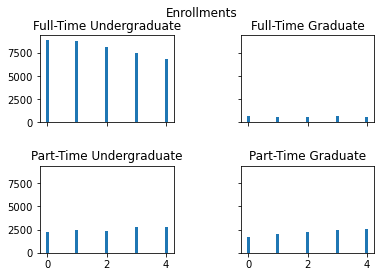

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

axes[0,0].bar(x_axis, enrollments_df.iloc[0,:], width = width)
axes[0,0].set_title('Full-Time Undergraduate')

axes[0,1].bar(x_axis, enrollments_df.iloc[1,:], width = width)
axes[0,1].set_title('Full-Time Graduate')

axes[1,0].bar(x_axis, enrollments_df.iloc[2,:], width = width)
axes[1,0].set_title('Part-Time Undergraduate')

axes[1,1].bar(x_axis, enrollments_df.iloc[3,:], width = width)
axes[1,1].set_title('Part-Time Graduate')

fig.suptitle('Enrollments')
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

#graph below sectioned plots by year instead of student type
#also incorrect iloc method

THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).
- DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
- If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.
By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

McKenzie Church